### Deliverable 1: Preprocessing the Data for a Neural Network

#### Import dependencies.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import pandas as pd 


In [2]:
# addtional Dependencies to Visualize data druring EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

#### Import the input dataset.

#### Generate categorical variable list.

In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# look at data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# look at the shape
application_df.shape

(34299, 12)

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# look at the shape
application_df.shape

(34299, 10)

In [8]:
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

#### Determine the number of unique values in each column.

In [9]:
# Determine the number of unique values in each column.
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [10]:
# Determine the number of unique values in each column.
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [11]:
# Drop the non-beneficial ID columns, 'STATUS' and 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   INCOME_AMT        34299 non-null  object
 6   ASK_AMT           34299 non-null  int64 
 7   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

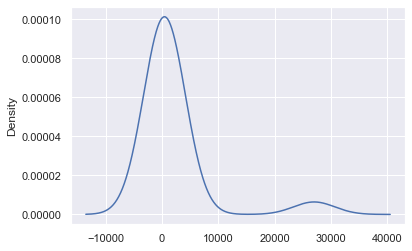

In [13]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()
plt.savefig('./Images/Density_1_D31.png')

In [14]:
replace_application = list(application_counts[application_counts < 500].index)

In [15]:
# Determine which values to replace if counts are less than ...? less than 100
replace_application = list(application_counts[application_counts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

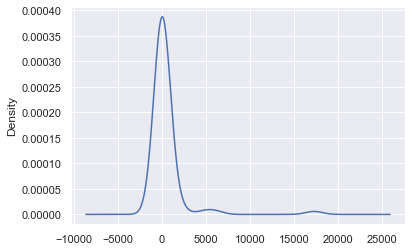

In [17]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()
plt.savefig('./Images/Density_2_D31.png')

In [18]:
class_counts < 1000

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C4120     True
C8210     True
C2561     True
C4500     True
C2150     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [19]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [20]:
# Determine which values to replace if counts are less than ..? 1000
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
application_df.nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         6
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [22]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   INCOME_AMT        34299 non-null  object
 6   ASK_AMT           34299 non-null  int64 
 7   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


In [23]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [24]:
# Testing
application_df[application_cat]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,T10,Independent,C1000,ProductDev,Association,0
1,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,T5,CompanySponsored,C3000,ProductDev,Association,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0
34297,T5,Independent,C3000,ProductDev,Association,0


#### Create a OneHotEncoder instance.

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

#### Fit and transform the OneHotEncoder.

In [26]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

#### Add the encoded variable names to the DataFrame.

In [27]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Merge one-hot encoded features and drop the originals.

In [28]:
#### Merge one-hot encoded features and drop the originals.
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# check if all nemeric
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
application_df.shape

(34299, 41)

In [31]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ASK_AMT                       34299 non-null  int64  
 1   IS_SUCCESSFUL                 34299 non-null  int64  
 2   APPLICATION_TYPE_Other        34299 non-null  float64
 3   APPLICATION_TYPE_T10          34299 non-null  float64
 4   APPLICATION_TYPE_T19          34299 non-null  float64
 5   APPLICATION_TYPE_T3           34299 non-null  float64
 6   APPLICATION_TYPE_T4           34299 non-null  float64
 7   APPLICATION_TYPE_T5           34299 non-null  float64
 8   APPLICATION_TYPE_T6           34299 non-null  float64
 9   APPLICATION_TYPE_T7           34299 non-null  float64
 10  APPLICATION_TYPE_T8           34299 non-null  float64
 11  AFFILIATION_CompanySponsored  34299 non-null  float64
 12  AFFILIATION_Family/Parent     34299 non-null  float64
 13  A

#### Split the preprocessed data into training and testing dataset.

In [32]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values

C:\Users\dsmit\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


#### Split the preprocessed data into features and target arrays.

In [33]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train[:1]

array([[5.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00,
        0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
        0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 1.e+00,
        0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00]])

#### Create a StandardScaler instance.

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

#### Fit the StandardScaler.

In [35]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

#### Scale the data.

In [36]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

#### Define the model.

In [37]:
len(X_train[0])

40

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30



nn = tf.keras.models.Sequential()

#### Add hidden layers.

In [39]:
# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

In [40]:
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


In [41]:
# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


#### Add the output layer.

In [42]:
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#### Check the structure of the model.

In [43]:
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,891
Trainable params: 8,891
Non-trainable params: 0
_________________________________________________________________


#### Implement CheckPoints
###### note:Create a callback that saves the model's weights every 5 epochs

In [44]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
Checkpoint_path = "Checkpoints/weights.{epoch:02d}.hdf5"

In [45]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=Checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch")

In [47]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50, callbacks=[cp_callback])

Epoch 1/50
786/804 [============================>.] - ETA: 0s - loss: 0.5664 - accuracy: 0.7251
Epoch 1: saving model to Checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 1ms/step - loss: 0.5668 - accuracy: 0.7246
Epoch 2/50
774/804 [===========================>..] - ETA: 0s - loss: 0.5549 - accuracy: 0.7295
Epoch 2: saving model to Checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7290
Epoch 3/50
778/804 [============================>.] - ETA: 0s - loss: 0.5516 - accuracy: 0.7318
Epoch 3: saving model to Checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7314
Epoch 4/50
785/804 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7329
Epoch 4: saving model to Checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7325
Epoch 5/50
782/804 [============================

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5555 - accuracy: 0.7257 - 394ms/epoch - 1ms/step
Loss: 0.5554524064064026, Accuracy: 0.7257142663002014


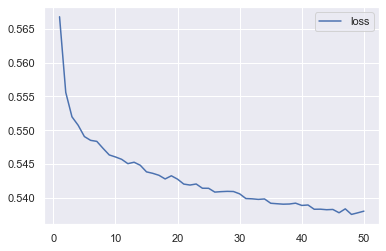

In [49]:
# cretae a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# plot the loss
history_df.plot(y="loss")
plt.savefig('./Images/History_D31.png')

In [50]:
# Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity_d31.h5")